# analisis de menciones en twitter

Se realiza un proceso para analizar las menciones que se generan en torno de una figura publica, en este caso vamor a identificar
- frecuencia de menciones
- frecuencia de menciones x dia
- palabras mas usadas en mencion
- sentimiento de las menciones


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

from wordcloud import WordCloud
from collections import Counter
from spacy.lang.es.stop_words import STOP_WORDS
from pysentimiento import create_analyzer

nlp = spacy.load('es_core_news_lg')
es_stop_words = list(STOP_WORDS)
sent_analyzer = create_analyzer(task='sentiment', lang='es')


In [2]:
def genera_texto_tweets(lista_tweets):
    """Concatena todos los tweets de la lista
    para crear un solo cuerpo de texto con todos los
    tweets generados.

    Args:
        lista_tweets (_type_): lista con los tweets 

    Returns:
        string: un texto con todos los tweets 
    """
    text = ""
    
    for tweet in lista_tweets:
        text = text+' '+tweet+'\n'
        
    return text

In [3]:
path_archivo_menciones = './data/menciones/raw_menciones_rodolfo_12052022.csv'

In [4]:
df_menciones = pd.read_csv(path_archivo_menciones, sep='|')
df_menciones = df_menciones[['id',
                             'tweet',
                             'id_autor',
                             'metrics',
                             'source',
                             'created_at']]

df_menciones['fecha'] = pd.to_datetime(df_menciones['created_at']).dt.date

In [5]:
doc_menciones = nlp(genera_texto_tweets(list(df_menciones['tweet'])))

In [6]:
lista_palabras = []

for token in doc_menciones:
    lista_palabras.append(token.text)
    
lista_palabras = [word for word in lista_palabras if word not in es_stop_words]
lista_palabras = [word for word in lista_palabras if word not in [' ', ' \n', ' \n ', '\n']]
lista_palabras = [word for word in lista_palabras if word.isalpha()]
lista_palabras = [word for word in lista_palabras if len(word) > 2]

In [7]:
cnt_palabras = Counter(lista_palabras)

(-0.5, 2999.5, 2999.5, -0.5)

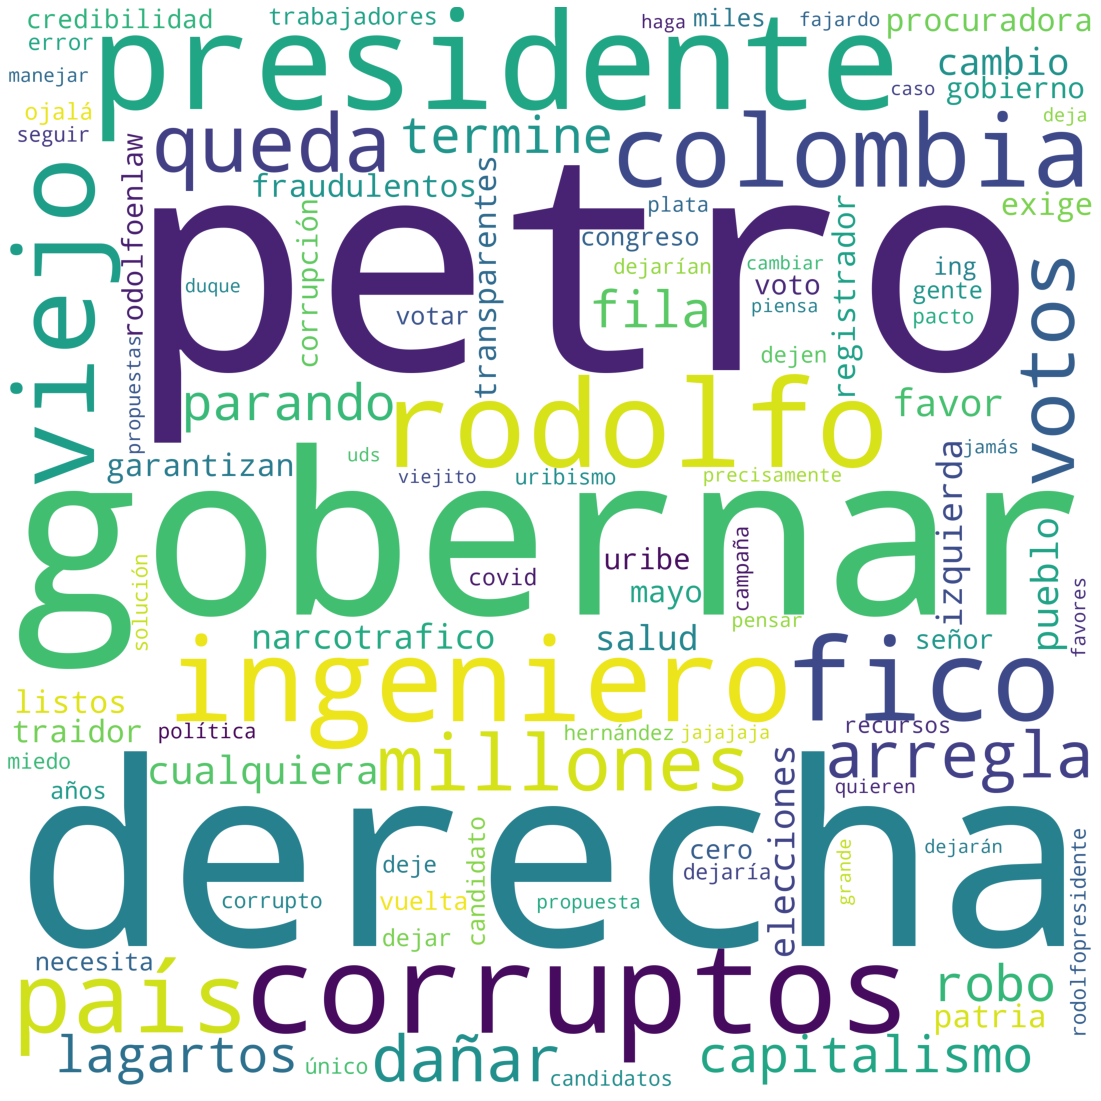

In [16]:
wrdCloud = WordCloud(width=3000,
                     height=3000,
                     max_words=100,
                     collocations=False,
                     background_color='white',
                     random_state=1,
                     stopwords=es_stop_words).generate_from_frequencies(cnt_palabras)

plt.figure(figsize=(20,20))
plt.imshow(wrdCloud)
plt.axis('off')

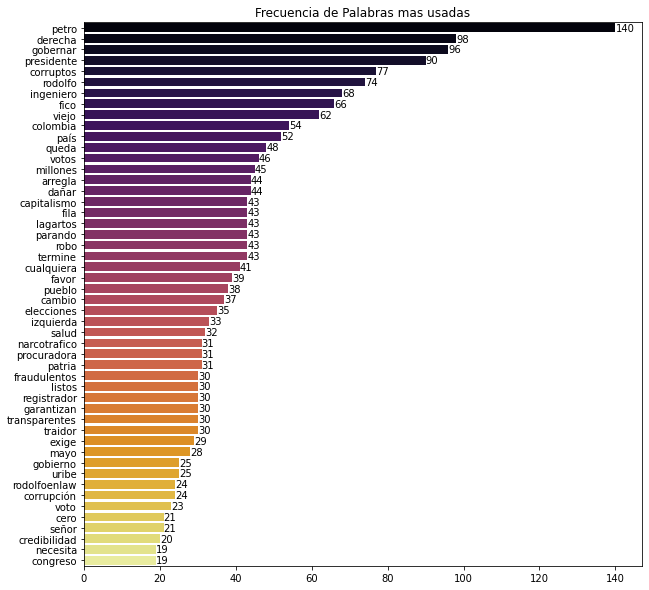

In [9]:
plt.figure(figsize=(10,10))
plt.title("Frecuencia de Palabras mas usadas")
plt.xlabel = "Palabra"
plt.ylabel = "Frecuencia"

#Generamos gráfico de barras con las primeras 20 palabras mas usadas de petro

most_common = cnt_palabras.most_common(50)

x = []
y = []

for tupla in most_common:
    x.append(tupla[0])
    y.append(tupla[1])
    
p_bar = sns.barplot(x=y,
            y=x,
            palette='inferno',
            orient='h')

for i in p_bar.containers:
    p_bar.bar_label(i,)
    
plt.show()

In [10]:
lis_sentimiento_tweet = []

#Se calcula el sentimiento de cada uno de los tweets
res_sent_tweets = sent_analyzer.predict(df_menciones['tweet'])

for sent in res_sent_tweets:
    lis_sentimiento_tweet.append([sent.output, sent.probas['POS'], sent.probas['NEU'], sent.probas['NEG']])
    
df_sent_tweets = pd.DataFrame(lis_sentimiento_tweet)
df_sent_tweets.columns = ['sentimiento', 'positividad', 'neutralidad', 'negatividad']
df_menciones = pd.concat([df_menciones, df_sent_tweets], axis=1)

  0%|          | 0/27 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 848
  Batch size = 32


  0%|          | 0/27 [00:00<?, ?it/s]

<AxesSubplot:xlabel='sentimiento', ylabel='Count'>

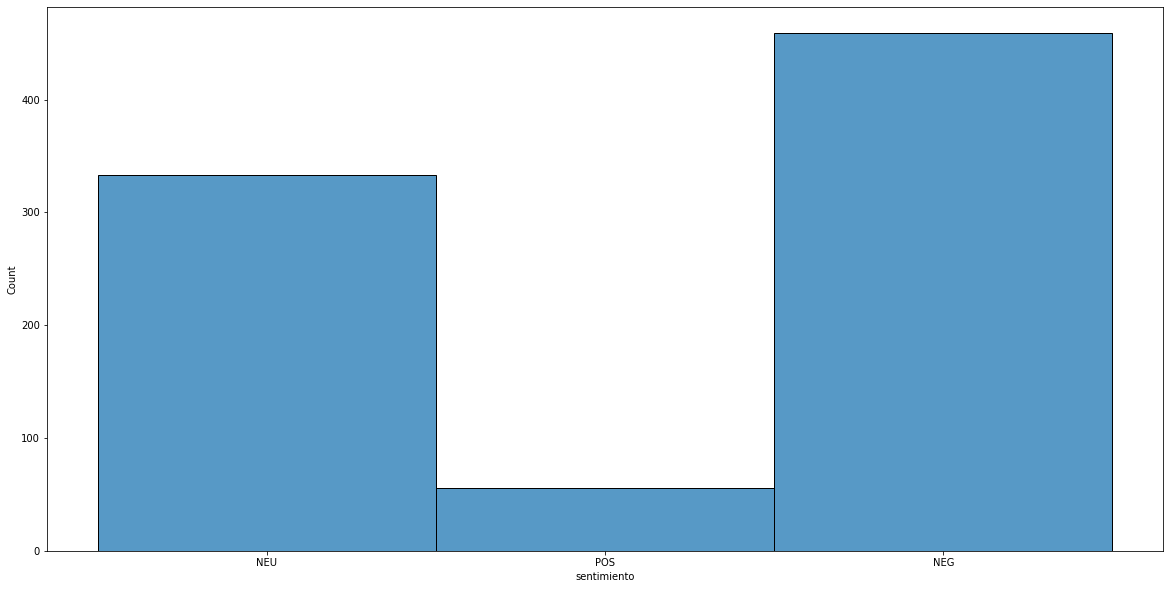

In [11]:
plt.figure(figsize=(20,10))

sns.histplot(data = df_menciones,
            x = 'sentimiento')

In [12]:
df_menciones_negativas = df_menciones[df_menciones['sentimiento']=='NEG']

In [13]:
df_menciones_negativas.sort_values(by='negatividad', ascending=False)

,id,tweet,id_autor,metrics,source,created_at,fecha,sentimiento,positividad,neutralidad,negatividad
147,1524801137949433858,@ingrodolfohdez y ud tampoco lo dejaría gobern...,65505862,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for Android,2022-05-12 17:18:15+00:00,2022-05-12,NEG,0.000412,0.000593,0.998995
159,1524800747703083009,@camilabustos69 @wradiocolombia @ingrodolfohde...,1023253265524371456,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for iPhone,2022-05-12 17:16:42+00:00,2022-05-12,NEG,0.000409,0.000599,0.998992
84,1524802866875191299,@wradiocolombia @ingrodolfohdez desconoce el p...,128646096,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for Android,2022-05-12 17:25:07+00:00,2022-05-12,NEG,0.000456,0.000653,0.998891
371,1524788325302915074,@ingrodolfohdez #ungranerror es ese twitt suy...,1393781326298365956,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for Android,2022-05-12 16:27:20+00:00,2022-05-12,NEG,0.000367,0.000843,0.998791
733,1524769492538175488,@ingrodolfohdez #ungranerrores pensar que uste...,1510410164486168580,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for Android,2022-05-12 15:12:30+00:00,2022-05-12,NEG,0.000401,0.000847,0.998752
...,...,...,...,...,...,...,...,...,...,...,...
838,1524762836177764358,@carbonell515 @ingrodolfohdez nombe beto sea s...,1199044761568632832,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for Android,2022-05-12 14:46:03+00:00,2022-05-12,NEG,0.022664,0.446872,0.530465
782,1524766175560884224,@marleyserrano @ingrodolfohdez hay esperanza ...,1497398033713176583,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter Web App,2022-05-12 14:59:19+00:00,2022-05-12,NEG,0.054481,0.417853,0.527666
504,1524781745022935041,@ingrodolfohdez usted tan efusivo en todas sus...,1445692237795315714,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter Web App,2022-05-12 16:01:11+00:00,2022-05-12,NEG,0.013794,0.460890,0.525316
79,1524802979567738880,@ingrodolfohdez #ficoelpresidentedelagente #fi...,251690054,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Twitter for Android,2022-05-12 17:25:34+00:00,2022-05-12,NEG,0.096865,0.450207,0.452928


In [14]:
doc_menciones_negativas = nlp(genera_texto_tweets(list(df_menciones_negativas['tweet'])))

lista_palabras_negativas = []

for token in doc_menciones_negativas:
    lista_palabras_negativas.append(token.lemma_)
    

lista_palabras_negativas = [word for word in lista_palabras_negativas if word not in es_stop_words]
lista_palabras_negativas = [word for word in lista_palabras_negativas if word not in [' ', ' \n', ' \n ', '\n']]
lista_palabras_negativas = [word for word in lista_palabras_negativas if word.isalpha()]
lista_palabras_negativas = [word for word in lista_palabras_negativas if len(word) > 2]
    

In [15]:
for negativo in doc_menciones_negativas.sents:
    print(negativo)

 @carlosaltamar27 @ingrodolfohdez y si dice tantas pendejadas para que lo quieren en el tal pacto histórico 🤔🤔🤔
 @ingrodolfohdez ni por el putas voto por usted
 @wradiocolombia @ingrodolfohdez #rodolfoenlaw perverso  esclavista  corrupto  desprecia al pueblo con su lenguaje uribista socarrado
 jajajaja     el único embajador que se necesita es el embajador de méxico    los demás no hacen nada  @ingrodolfohdez
 @wradiocolombia @ingrodolfohdez el cumple! en bucaramanga lo hizo  el problema es que el congreso lo deje  o también les va a poner la mano
 @ivanduque credibilidad cero 5 millones de votos fraudulentos a favor de #narcotrafico listos para 29 de mayo registrador y procuradora garantizan así las elecciones transparentes q el traidor a la patria @alvarouribevel exige capitalismo sí#narcotrafico no@ingrodolfohdez presidente
 #siguelaw #rodolfoenlaw | "el estado coge la plata de todos y no alcanza  vamos por otra reforma  en 30 años nos han metido 19 reformas y todo sigue igual": @in